In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [13]:
house_price_dataframe = pd.read_csv("boston.csv")

In [14]:
house_price_dataframe.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [15]:
house_price_dataframe.shape

(506, 15)

In [18]:
house_price_dataframe.isnull().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
B             0
LSTAT         0
PRICE         0
dtype: int64

In [19]:
house_price_dataframe.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [20]:
correlation = house_price_dataframe.corr()

<Axes: >

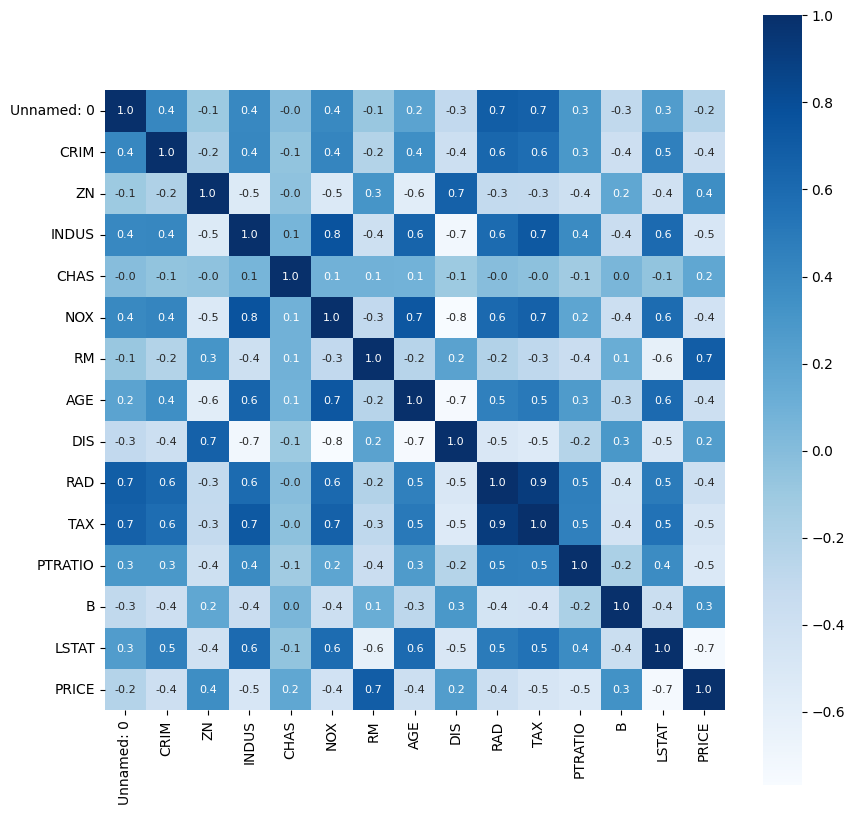

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [22]:
X = house_price_dataframe.drop(columns='PRICE', axis=1)
Y = house_price_dataframe['PRICE']

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(506, 14) (404, 14) (102, 14)


In [26]:
model = XGBRegressor()

In [27]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [30]:
training_data_prediction = model.predict(X_train)
training_data_prediction

array([23.09445  , 20.99228  , 20.104528 , 34.69831  , 13.914912 ,
       13.498504 , 22.000854 , 15.206232 , 10.898076 , 22.688675 ,
       13.796982 ,  5.5959272, 29.802038 , 49.994926 , 34.892696 ,
       20.604803 , 23.389652 , 19.206667 , 32.705322 , 19.597044 ,
       27.001009 ,  8.393553 , 45.992256 , 21.694191 , 27.081312 ,
       19.393814 , 19.28983  , 24.808271 , 22.62144  , 31.703571 ,
       18.53784  ,  8.701313 , 17.409687 , 23.69455  , 13.296358 ,
       10.484301 , 12.670515 , 24.996946 , 19.696505 , 14.900087 ,
       24.200705 , 24.997162 , 14.898304 , 16.99991  , 15.596548 ,
       12.707401 , 24.497099 , 15.003988 , 50.000412 , 17.52259  ,
       21.200375 , 32.00222  , 15.606369 , 22.901505 , 19.329111 ,
       18.692701 , 23.293829 , 37.20319  , 30.102093 , 33.101288 ,
       20.993074 , 49.98552  , 13.401927 ,  5.0106983, 16.492916 ,
        8.401298 , 28.686829 , 19.479248 , 20.587677 , 45.404484 ,
       39.802147 , 33.40655  , 19.803558 , 33.414024 , 25.2986

In [35]:
rmse = metrics.root_mean_squared_error(Y_train, training_data_prediction)
rse = metrics.r2_score(Y_train, training_data_prediction)
mae = metrics.mean_absolute_error(Y_train, training_data_prediction)
print(rmse, rse, mae)

0.012626374714680448 0.9999981148690247 0.00899344245986183


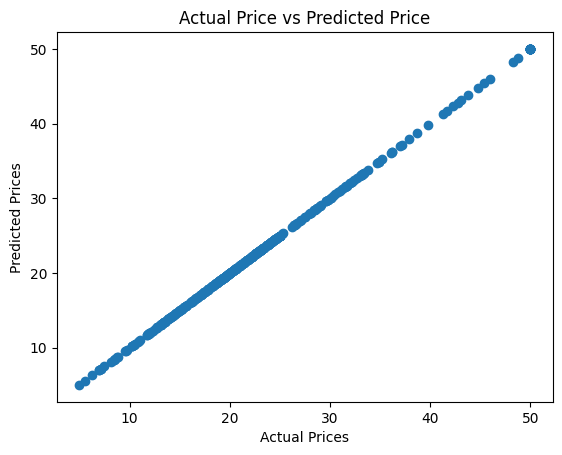

In [36]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [32]:
test_data_prediction = model.predict(X_test)
test_data_prediction

array([22.276484 , 20.847784 , 32.212288 , 30.352758 ,  9.880609 ,
       13.585515 , 24.083645 , 26.414585 , 23.936134 , 19.911514 ,
       26.195131 , 26.91169  , 20.615885 , 20.39346  , 13.466131 ,
       22.745438 , 20.253252 , 10.296182 ,  7.203268 , 14.749683 ,
       22.30107  , 20.56681  , 33.22046  , 18.480366 , 13.173377 ,
       17.553308 , 47.477795 , 32.145344 , 37.13484  , 19.527271 ,
       18.03603  , 20.978748 , 30.06721  , 24.492239 , 12.64161  ,
       17.98493  , 11.670619 , 21.033613 , 23.782217 , 21.426956 ,
       27.091625 , 13.175451 , 27.535337 ,  9.283809 , 21.078484 ,
       13.402202 , 33.481277 , 14.156194 , 31.664139 , 15.410337 ,
       31.740955 , 25.666723 ,  6.5439467, 33.09297  , 25.21807  ,
       18.609163 , 19.290167 , 18.456764 , 15.44207  , 23.495596 ,
       19.885464 , 22.258724 , 19.295998 , 28.572536 , 32.538025 ,
       25.756645 , 49.989235 , 27.710165 , 10.723625 , 24.055264 ,
       15.0552   , 10.2660675, 14.688237 , 19.51244  , 26.5267

In [34]:
rmse = metrics.root_mean_squared_error(Y_test, test_data_prediction)
rse = metrics.r2_score(Y_test, test_data_prediction)
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)
print(rmse, rse, mae)

2.70303756404571 0.9126650746118214 2.0080178139256493


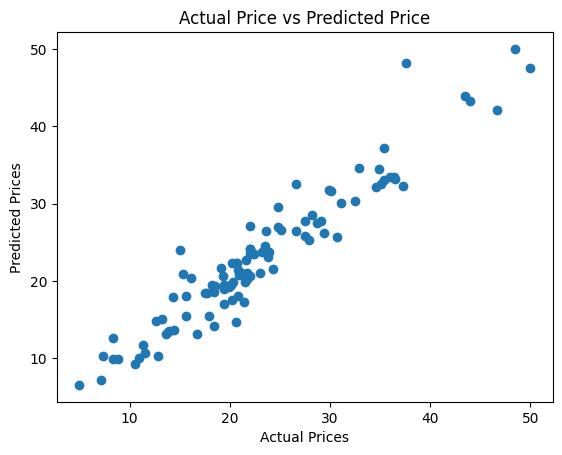

In [37]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price vs Predicted Price')
plt.show()